R-squared (Lasso): 0.5188435378903503
R-squared (Ridge): 0.5210590688492825
MSE (Lasso): 1.2693385972265137
MSE (Ridge): 1.2634938062261134


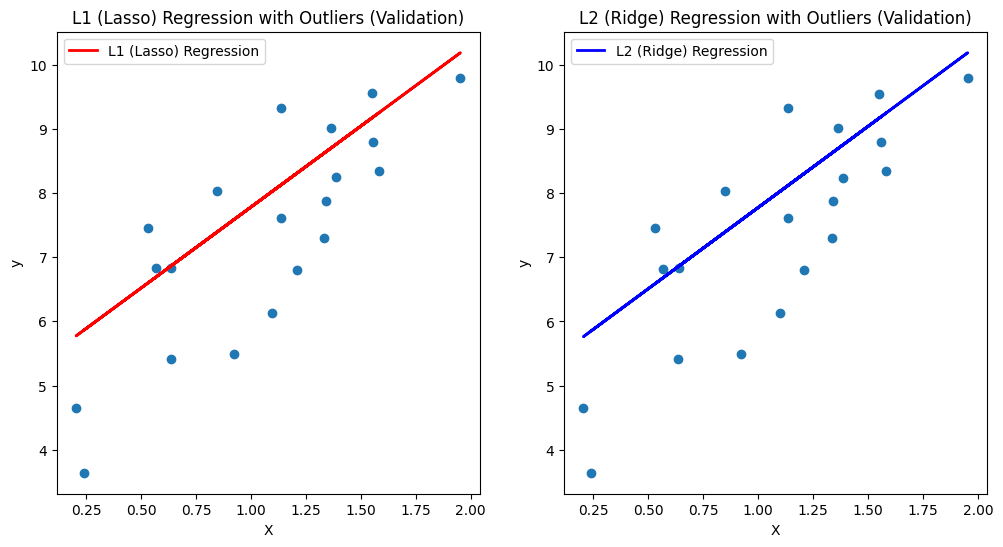

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def lasso_regression_gradient_descent(X, y, learning_rate, num_iterations, alpha):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize coefficients to zeros
    cost_history = []

    for iteration in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, theta)

        # Calculate the gradient of the cost function with L1 regularization
        gradient = (1/m) * (np.dot(X.T, (y_pred - y)) + alpha * np.sign(theta))

        # Update coefficients
        theta -= learning_rate * gradient

        # Calculate the cost (loss) with L1 regularization for monitoring
        cost = (1/(2 * m)) * np.sum((y_pred - y)**2) + alpha * np.sum(np.abs(theta))
        cost_history.append(cost)

    return theta, cost_history

def ridge_regression_gradient_descent(X, y, learning_rate, num_iterations, alpha):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize coefficients to zeros
    cost_history = []

    for iteration in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, theta)

        # Calculate the gradient of the cost function with L2 regularization
        gradient = (1/m) * (np.dot(X.T, (y_pred - y)) + alpha * theta)

        # Update coefficients
        theta -= learning_rate * gradient

        # Calculate the cost (loss) with L2 regularization for monitoring
        cost = (1/(2 * m)) * np.sum((y_pred - y)**2) + (alpha / (2 * m)) * np.sum(theta**2)
        cost_history.append(cost)

    return theta, cost_history




# Simulate a dataset with outliers
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y[95:] += 10  # Add outliers to the last 5 points

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the learning rate, number of iterations, and regularization strength (alpha)
learning_rate = 0.1
num_iterations = 1000
alpha = 0.1

# Add a column of ones to X for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Use L1 (Lasso) regression
theta_lasso, _ = lasso_regression_gradient_descent(X_train_b, y_train, learning_rate, num_iterations, alpha)

# Use L2 (Ridge) regression
theta_ridge, _ = ridge_regression_gradient_descent(X_train_b, y_train, learning_rate, num_iterations, alpha)

# Make predictions on the test set
y_pred_lasso = X_test_b.dot(theta_lasso)
y_pred_ridge = X_test_b.dot(theta_ridge)

# Calculate R-squared and mean squared error for validation
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"R-squared (Lasso): {r2_lasso}")
print(f"R-squared (Ridge): {r2_ridge}")
print(f"MSE (Lasso): {mse_lasso}")
print(f"MSE (Ridge): {mse_ridge}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, color='red', linewidth=2, label='L1 (Lasso) Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('L1 (Lasso) Regression with Outliers (Validation)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_ridge, color='blue', linewidth=2, label='L2 (Ridge) Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('L2 (Ridge) Regression with Outliers (Validation)')
plt.legend()

plt.show()
